# Predicting bike rentals using Random Forests
In this project, we will analyze the dataset that contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information sourced from UCI. We will be predicting total number of bike rentals using decision trees and random forests. We implement and fit the data using Linear Regression, Decision Trees and Random Forests.

### About the data
Bike-sharing systems are an upgraded version of traditional bike rentals, where the entire process—membership, rental, and return—is automated. Users can rent a bike from one location and return it to another. Currently, there are over 500 bike-sharing programs worldwide with more than 500,000 bicycles. These systems are gaining popularity due to their benefits for traffic, the environment, and health.

Besides their real-world use, the data from bike-sharing systems is valuable for research. Unlike buses or subways, these systems record travel duration, start and end locations, making them useful for tracking city mobility. This data can act as a virtual sensor network, helping detect important events in the city.

So, let's begin with analysis!



### Importing libraries and exploring data

Let's import the necessary libraries and load the bike rental dataset. We use pandas for handling data and seaborn and matplotlib for creating visualizations. The command %matplotlib inline ensures that plots appear directly in the notebook. The dataset, bike_rental_hour.csv, is read into a pandas DataFrame called bike_rentals. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

bike_rentals = pd.read_csv("bike_rental_hour.csv")
print(bike_rentals.shape)
bike_rentals.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Visualizing frequency distribution of target column.
Now, visualize the distribution of the total bike rentals (cnt column). We create a histogram using hist(), which shows how often different rental counts occur. This helps in understanding the pattern of bike rentals.

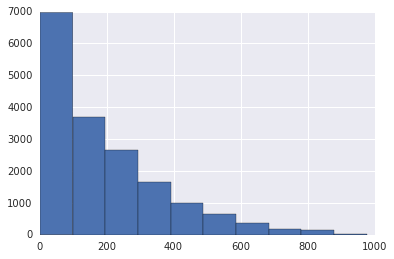

In [2]:
bike_rentals["cnt"].hist()

### Visualizing correlations between columns.

We analyze the correlations between different features in the dataset by generating a heatmap using sns.heatmap(). This heatmap visually represents the correlation matrix of the DataFrame, helping us identify possible relationships between variables.

In [1]:
sns.heatmap(bike_rentals.corr())

NameError: name 'sns' is not defined

### Creating new column to categorize different times in a day based on the hour column of the original data.

We create a new feature called time_label to categorize different times of the day. A function named assign_label is defined to assign a label (1, 2, 3, or 4) based on the hour of the day. We then apply this function to the hr (hour) column in the DataFrame to generate the time_label column. Finally, we display a random sample of five rows from the updated DataFrame.

In [4]:
def assign_label(row):
    hour = row
    if hour < 6:
        return 4
    elif hour < 12:
        return 1
    elif hour < 18:
        return 2
    else:
        return 3
    
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)
bike_rentals.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
16909,16910,2012-12-12,4,1,12,8,0,3,1,2,0.26,0.2576,0.65,0.1642,18,670,688,1
5909,5910,2011-09-08,3,0,9,18,0,4,1,3,0.64,0.5606,0.94,0.3582,2,66,68,3
6253,6254,2011-09-23,4,0,9,3,0,5,1,2,0.60,0.5000,1.00,0.0000,3,5,8,4
17014,17015,2012-12-16,4,1,12,17,0,0,0,2,0.38,0.3939,0.82,0.1045,29,214,243,2
9031,9032,2012-01-17,1,1,1,5,0,2,1,3,0.32,0.3030,0.66,0.3284,0,13,13,4


### Error Metric
The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

### Splitting the data.
We split the data into training and testing sets by calculating the index for an 80-20 split. Using this index, we create two new DataFrames: train for training (80% of the data) and test for testing (20% of the data).

In [5]:
splitting_index = round(0.8 * len(bike_rentals))
train = bike_rentals[:splitting_index]
test = bike_rentals[splitting_index:]

### Linear Regression - Training and Error.

We create and train a Linear Regression model by initializing a LinearRegression object and fitting it to the training data using selected features. After training, we use the model to predict bike rentals on the test data. Finally, we evaluate the model's performance by calculating the Root Mean Squared Error (RMSE), which measures the difference between actual and predicted values.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ["season", "yr", "mnth", "hr", "holiday", "workingday", "weathersit", "temp", "hum", "windspeed", "time_label"]

lr = LinearRegression()
lr.fit(train[features], train["cnt"])
predictions = lr.predict(test[features])

rmse = mean_squared_error(test["cnt"], predictions) ** 0.5
rmse

171.06184873751826

Error is quite high. May be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts.

### Decision Tree : Training and error

Let's try the Decision Tree algorithm to see if it gives us a better model. It is more complex and could perform better.

In [7]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(train[features], train["cnt"])
predictions2 = dtr.predict(test[features])

rmse = mean_squared_error(test["cnt"], predictions2) ** 0.5
rmse

98.87639978190948

The error has dropped significantly. Let's see if the model is overfitiing by looking at the predictions on training set. Later, we will tweak some parameters of the model to see if it improves the model.

In [8]:
predictions1 = dtr.predict(train[features])

rmse = mean_squared_error(train["cnt"], predictions1) ** 0.5
rmse

1.9164280681296233

There is good chance the model is overfitting. Let's tweak some parameters.

In [9]:
dtr = DecisionTreeRegressor(min_samples_split = 36, min_samples_leaf = 4) # 36,4 -> 84.25
dtr.fit(train[features], train["cnt"])

predictions1 = dtr.predict(train[features])
rmse = mean_squared_error(train["cnt"], predictions1) ** 0.5
print(rmse)

predictions2 = dtr.predict(test[features])
rmse = mean_squared_error(test["cnt"], predictions2) ** 0.5
rmse

43.06866550476459


84.25360241363614

After a lot of trial and error, the optimum parameters to be found, bring the train error is 43.06 and test error is 84.25.

Let's use random forest algorithm, which works better than decision tree algorithm.

### Random Forest : Training and error

In [10]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor() 
rfr.fit(train[features], train["cnt"])

predictions1 = rfr.predict(train[features])
rmse = mean_squared_error(train["cnt"], predictions1) ** 0.5
print(rmse)

predictions2 = rfr.predict(test[features])
rmse = mean_squared_error(test["cnt"], predictions2) ** 0.5
rmse

18.758794619455966


76.71835680343504

After some trial and error, the optimum hyperparameters were the ones calculated. The train error is 18.46 and the test error is 77.02

This model can be used to get a fair prediction of rentals in the future. 

#### Summary and Future Work

This project predicts the total number of bike rentals based on weather, time of day, season, and holidays. Bike rental companies can use these predictions to optimize operations and meet customer demand efficiently.

The dataset includes hourly bike rental data along with weather and seasonal conditions. Key features include temperature, humidity, wind speed, time-related factors (hour, day, month, year), seasons, and whether it is a holiday or a working day.

To develop the model, we first applied Linear Regression, but it produced high errors. We then used a Decision Tree model, which improved accuracy but led to overfitting. To solve this, we implemented a Random Forest model, which delivered the best performance by reducing errors on both training and testing data. We evaluated the model’s accuracy using the Root Mean Squared Error (RMSE) metric.

The trained model enables real-time demand prediction, dynamic pricing, resource allocation, infrastructure planning, targeted marketing, and integration with other transportation services.

In the future, we plan to engineer new features, fine-tune hyperparameters, test advanced algorithms like Gradient Boosting and Neural Networks, apply time series analysis, and develop a real-time prediction system with a user-friendly interface. We also aim to collaborate with bike rental companies and open-source the project to expand its impact.

In conclusion, we successfully built a machine learning-based bike rental prediction model that helps bike rental companies and city planners make data-driven decisions. By continuously improving and implementing the model, we can maximize its benefits and improve bike-sharing systems.

### Final Note

The bike rental prediction model and data can be used in several practical ways to improve bike-sharing systems. Real-time predictions can help bike rental companies allocate bikes efficiently based on factors like weather and time of day. Dynamic pricing can be implemented to adjust rental costs depending on demand, increasing revenue during peak times and encouraging rentals during low-demand periods. The model also aids in resource optimization, helping companies plan staff schedules, bike maintenance, and distribution more effectively. Additionally, insights from historical and predicted data can guide infrastructure planning, ensuring rental stations are placed where demand is highest. Marketing strategies can also benefit, as companies can target promotions to specific customer groups or time periods. Integrating the model with public transportation and ride-sharing services can provide users with a seamless travel experience. To maintain accuracy, continuous data collection and model retraining are necessary, and incorporating external factors like holidays or special events can further improve predictions. Lastly, user feedback can refine the model to better meet customer needs. By using these insights, bike rental companies and city planners can enhance operations, improve customer experiences, and make bike-sharing more efficient.